## Práctica 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [6]:
df = pd.read_csv('Heart.xls')

In [25]:
df['MEDV'].value_counts(normalize = True)

1    0.544554
0    0.455446
Name: MEDV, dtype: float64

In [9]:
var = [x for x in df.columns if x!='MEDV']

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[var]),
                 columns=var)
df_sc.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [11]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[var]),
                     columns=var)
df_pca.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-12.267345,2.873838,14.969879,6.892940,-0.072468,2.664652,0.268713,1.084704,-0.924199,0.473778,0.731103,-0.290394,0.512576
1,2.690137,-39.871374,0.877882,-10.583598,2.598773,2.460497,-0.207808,0.519390,0.194345,0.574327,0.404207,-0.425920,-0.148125
2,-42.950214,-23.636820,1.759446,-7.786655,0.436244,0.296905,-0.437425,0.514733,-0.210274,-0.619716,-0.915397,0.217828,0.079759
3,-10.944756,-28.438036,-7.044180,8.328134,0.076565,0.135460,-0.677191,0.074112,0.431605,-0.405790,0.377702,-0.246167,-0.048669
4,106.979053,-15.874468,-14.861575,3.223808,-0.242000,-0.502284,-1.188403,0.373915,0.660464,-0.147891,0.158278,0.743523,-0.060164


In [12]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([7.47564199e-01, 1.50370221e-01, 8.45968470e-02, 1.62159604e-02,
       3.84085658e-04, 2.81234229e-04, 2.28993383e-04, 9.98328415e-05,
       7.72143117e-05, 5.87402295e-05, 5.02927817e-05, 4.09679747e-05,
       3.14113086e-05])

In [16]:
df_pca['MEDV'] = df['MEDV']
df_pca.columns = ['PC1', 'PC2','PC3','PC4','PC5', 'PC6','PC7','PC8','PC9', 
                  'PC10','PC11','PC12', 'PC13','MEDV']
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,MEDV
0,-12.267345,2.873838,14.969879,6.892940,-0.072468,2.664652,0.268713,1.084704,-0.924199,0.473778,0.731103,-0.290394,0.512576,1
1,2.690137,-39.871374,0.877882,-10.583598,2.598773,2.460497,-0.207808,0.519390,0.194345,0.574327,0.404207,-0.425920,-0.148125,1
2,-42.950214,-23.636820,1.759446,-7.786655,0.436244,0.296905,-0.437425,0.514733,-0.210274,-0.619716,-0.915397,0.217828,0.079759,1
3,-10.944756,-28.438036,-7.044180,8.328134,0.076565,0.135460,-0.677191,0.074112,0.431605,-0.405790,0.377702,-0.246167,-0.048669,1
4,106.979053,-15.874468,-14.861575,3.223808,-0.242000,-0.502284,-1.188403,0.373915,0.660464,-0.147891,0.158278,0.743523,-0.060164,1


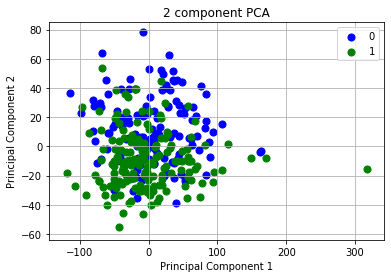

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1,1, 1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = [0, 1]
colors = ['b', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca['MEDV'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
    , df_pca.loc[indicesToKeep, 'PC2']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()